# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns.
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings("ignore")


In [7]:
# Setting the default style of the plots
sns.set_style('whitegrid')
sns.set_palette('Set2')

# My custom color palette
my_palette = ["#7A92FF", "#FF7AEF", "#B77AFF", "#A9FF7A", "#FFB27A", "#FF7A7A",
             "#7AFEFF", "#D57AFF", "#FFDF7A", "#D3FF7A"]

In [8]:
# Importing the 3 datasets
data_2015 = pd.read_csv("C:/Users/singh/Downloads/archive/2015.csv")
data_2016 = pd.read_csv("C:/Users/singh/Downloads/archive/2016.csv")
data_2017 = pd.read_csv("C:/Users/singh/Downloads/archive/2017.csv")

In [9]:
data_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
# Tables have different columns, so first we will keep only the columns we need
data_2015 = data_2015[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
data_2016 = data_2016[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
data_2017 = data_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
                       'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 
                       'Dystopia.Residual']]

In [11]:
new_names = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']

data_2015.columns = new_names
data_2016.columns = new_names
data_2017.columns = new_names



In [12]:
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017

In [13]:
# Merge the data together
data = pd.concat([data_2015, data_2016, data_2017], axis=0)
data.head(3)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015


In [14]:
# New data
data_2018 = pd.read_csv("C:/Users/singh/Downloads/archive/2018.csv")
data_2019 = pd.read_csv("C:/Users/singh/Downloads/archive/2019.csv")

In [15]:
# Concatenate data
data_2018['Year'] = 2018
data_2019['Year'] = 2019


In [16]:
new_data = pd.concat([data_2018, data_2019], axis=0)


In [17]:
# Switching overall rank column with country/ region
columns_titles = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']
new_data = new_data.reindex(columns=columns_titles)

In [18]:
# Renaming old data columns:
old_data = data[['Country', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 'Family', 
                 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year']]
old_data.columns = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']

In [19]:
# Finally, concatenating all data
data = pd.concat([old_data, new_data], axis=0)

data

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


In [20]:
data[data['Perceptions of corruption'].isna()]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [21]:
data.dropna(axis = 0, inplace = True)

In [22]:
data.shape

(781, 10)

In [23]:
data.groupby(by='Year')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.5260,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.4040,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.5055,5.2790,6.10150,7.537
2018,155.0,5.366897,1.117433,2.905,4.4515,5.3580,6.15400,7.632
2019,156.0,5.407096,1.113120,2.853,4.5445,5.3795,6.18450,7.769


In [24]:
# First we group the data by year and average the factors
grouped = data.groupby(by = 'Year')[['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()

# Now we reconstruct the df by using melt() function
grouped = pd.melt(frame = grouped, id_vars='Year', value_vars=['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], var_name='Factor', value_name='Avg_value')

grouped.head()

,Year,Factor,Avg_value
0,2015,Score,5.375734
1,2016,Score,5.382185
2,2017,Score,5.354019
3,2018,Score,5.366897
4,2019,Score,5.407096


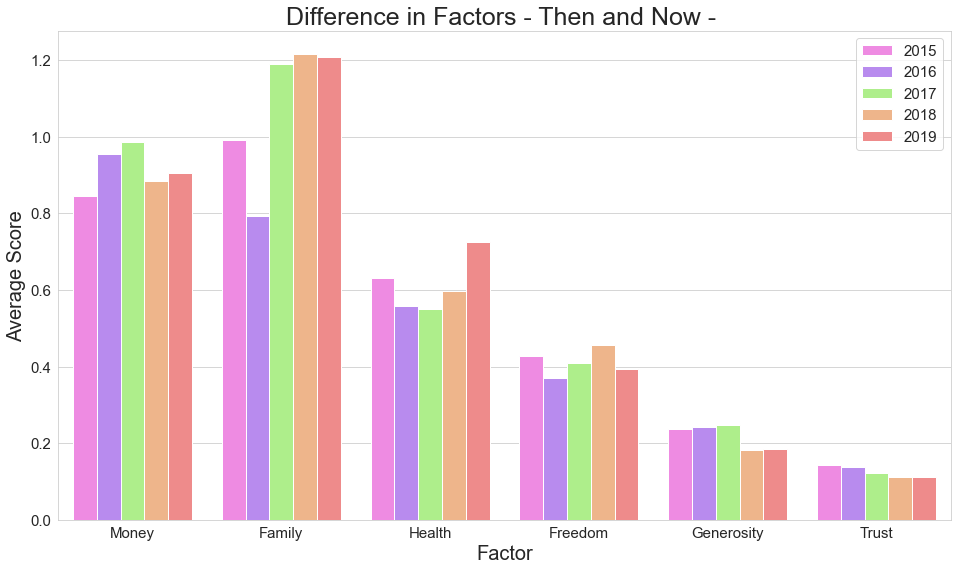

In [25]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Score']['Factor'], y = grouped['Avg_value'], 
            palette = my_palette[1:], hue = grouped['Year'])

plt.title("Difference in Factors - Then and Now - ", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['Money','Family', 'Health', 'Freedom', 'Generosity', 'Trust']);

In [26]:
# Average top 5 most happy countries
country_score_avg = data[data['Year']==2019].groupby(by = ['Country or region'])['Score'].mean().reset_index()
table = country_score_avg.sort_values(by = 'Score', ascending = False).head(10)

table

,Country or region,Score
43,Finland,7.769
36,Denmark,7.600
105,Norway,7.554
57,Iceland,7.494
98,Netherlands,7.488
133,Switzerland,7.480
132,Sweden,7.343
99,New Zealand,7.307
23,Canada,7.278
6,Austria,7.246


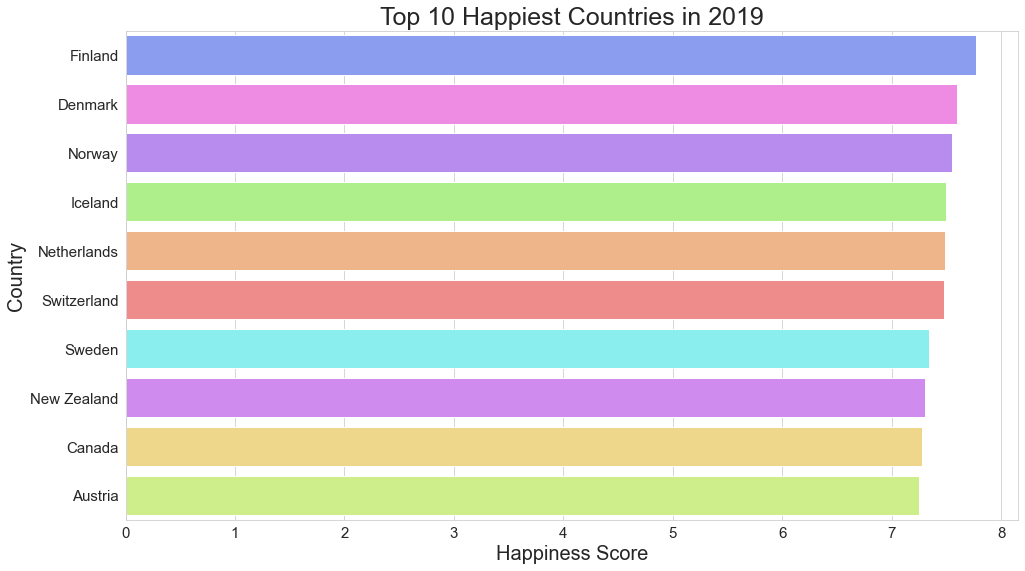

In [27]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table['Country or region'], x = table['Score'], palette = my_palette)

plt.title("Top 10 Happiest Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

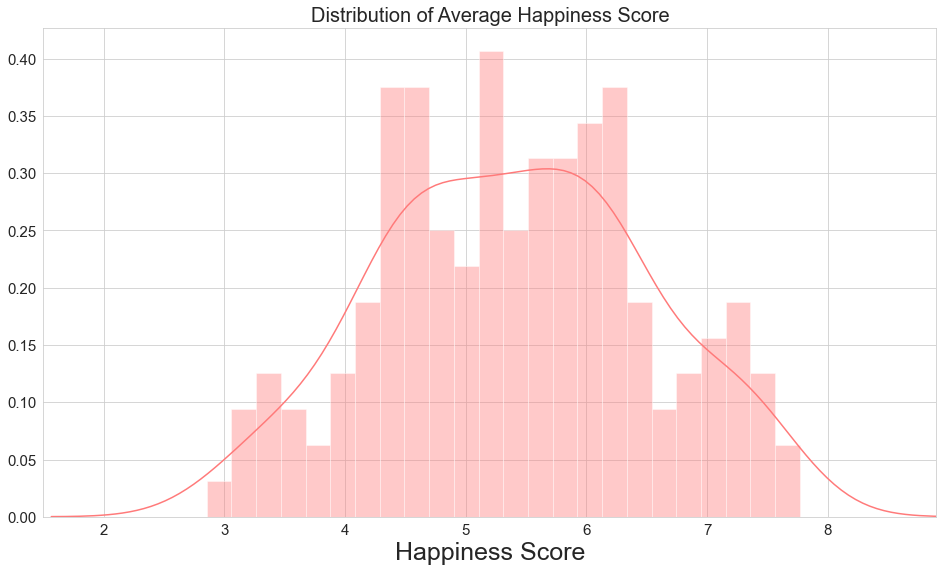

In [28]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (16, 9))

sns.distplot(a = country_score_avg['Score'], bins = 24, kde = True, color = "#FF7A7A")
plt.xlabel('Happiness Score', fontsize = 25)
plt.title('Distribution of Average Happiness Score', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

In [29]:
c1 = scipy.stats.pearsonr(data['Score'], data['GDP per capita'])
c2 = scipy.stats.pearsonr(data['Score'], data['Social support'])
c3 = scipy.stats.pearsonr(data['Score'], data['Healthy life expectancy'])
c4 = scipy.stats.pearsonr(data['Score'], data['Freedom to make life choices'])
c5 = scipy.stats.pearsonr(data['Score'], data['Generosity'])
c6 = scipy.stats.pearsonr(data['Score'], data['Perceptions of corruption'])

print('Happiness Score + GDP: pearson = ', round(c1[0],2), '   pvalue = ', round(c1[1],4))
print('Happiness Score + Family: pearson = ', round(c2[0],2), '   pvalue = ', round(c2[1],4))
print('Happiness Score + Health: pearson = ', round(c3[0],2), '   pvalue = ', round(c3[1],4))
print('Happiness Score + Freedom: pearson = ', round(c4[0],2), '   pvalue = ', round(c4[1],4))
print('Happiness Score + Generosity: pearson = ', round(c5[0],2), '   pvalue = ', round(c5[1],4))
print('Happiness Score + Trust: pearson = ', round(c6[0],2), '   pvalue = ', round(c6[1],4))

Happiness Score + GDP: pearson =  0.79    pvalue =  0.0
Happiness Score + Family: pearson =  0.65    pvalue =  0.0
Happiness Score + Health: pearson =  0.74    pvalue =  0.0
Happiness Score + Freedom: pearson =  0.55    pvalue =  0.0
Happiness Score + Generosity: pearson =  0.14    pvalue =  0.0001
Happiness Score + Trust: pearson =  0.4    pvalue =  0.0


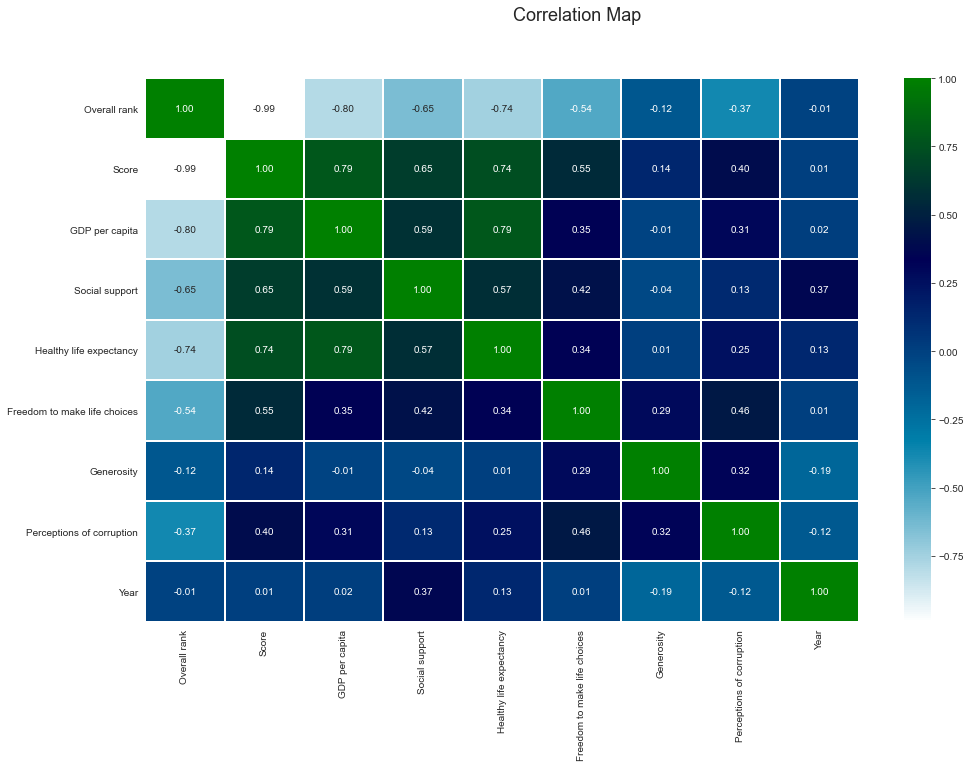

In [30]:
f,ax = plt.subplots(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, linewidths=1, cmap="ocean_r", fmt= '.2f',ax=ax)
plt.suptitle("Correlation Map", fontsize = 18)
plt.show()

In [33]:
data_new = data.drop(["Country or region", "Overall rank", "Year"], axis=1)
data_new.head()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [2]:
pip install plotly==4.13.0

  Using cached retrying-1.3.3.tar.gz (10 kB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=bb3fa5438b121236f3f21981d82c3c03cdc800ec6277ff6352ebe673792b2b91
  Stored in directory: c:\users\singh\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [65]:
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
#Feature selection and label selection
x = data_new.drop(['Score'], axis =1)

y = data_new['Score'].values
x


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...
151,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100
152,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700
153,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500
154,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500


In [38]:
# splitting of training data set into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
# Linear Regression
linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred_linear = linear.predict(x_test)

# finding the mean_squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("RMSE Error for Linear Regression:",rmse_linear)

# finding the r2 score or the variance
r2_linear = r2_score(y_test, y_pred_linear)
print("R2 Score for Linear Regression:", r2_linear)

RMSE Error for Linear Regression: 0.5614586943445301
R2 Score for Linear Regression: 0.7465230243518595


In [59]:
#Ridge Regression
model = Ridge()
model.fit(x_train, y_train)

y_pred_ridge = model.predict(x_test)

# finding the mean_squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE Error for Ridge Regression:", rmse_ridge)

# finding the r2 score or the variance
r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Score for Ridge Regression:", r2_ridge)

RMSE Error for Ridge Regression: 0.55815257291355
R2 Score for Ridge Regression: 0.749499408309493


In [61]:
# Decision tree regression model
tree = DecisionTreeRegressor(criterion='mse', max_depth=3)    # Initialize and fit regressor    

tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
# finding the mean_squared error
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print("RMSE Error for Decision Tree Regressor:",rmse_tree )

# finding the r2 score or the variance
r2_tree = r2_score(y_test, y_pred_tree)
print("R2 Score for Decision Tree Regressor:", r2_tree)

RMSE Error for Decision Tree Regressor: 0.6564818753919278
R2 Score for Decision Tree Regressor: 0.6534639869196129


In [66]:
# Bayesian Ridge regression model
br = BayesianRidge(n_iter=1000, tol = 0.5)    # Initialize and fit regressor    

br.fit(x_train, y_train)
y_pred_br = br.predict(x_test)
# finding the mean_squared error
mse_br = mean_squared_error(y_test, y_pred_br)
rmse_br = np.sqrt(mse_br)
print("RMSE Error for Decision Tree Regressor:",rmse_br )

# finding the r2 score or the variance
r2_br = r2_score(y_test, y_pred_br)
print("R2 Score for Bayesian Ridge Regressor:", r2_br)




RMSE Error for Decision Tree Regressor: 0.5604161757389228
R2 Score for Bayesian Ridge Regressor: 0.7474634644288491


In [62]:


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2_gbr = r2_score(y_test, y_pred)
print("R2 Score:", r2_gbr)

RMSE Error: 0.5069692639303207
R2 Score: 0.7933353703253119


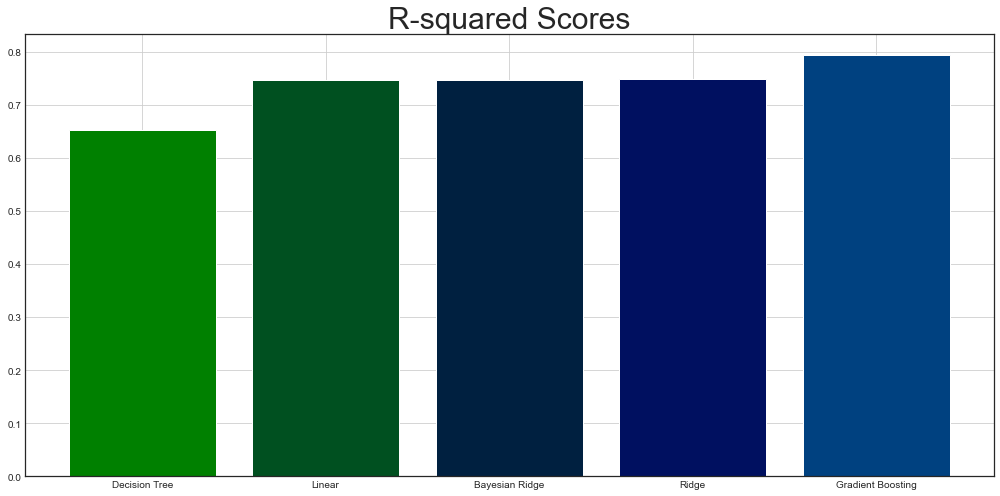

In [67]:
#Comparative analysis(R-squared scores) of plots obtained for different regression methods
r2_scores_regression = np.array([r2_linear,r2_ridge,r2_br,r2_tree,r2_gbr])
labels = np.array(['Linear','Ridge','Bayesian Ridge', 'Decision Tree', 'Gradient Boosting'])
indices = np.argsort(r2_scores_regression)
color = plt.cm.ocean(np.linspace(0, 1, 9))
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (14, 7)
plt.bar(range(len(indices)), r2_scores_regression[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R-squared Scores', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

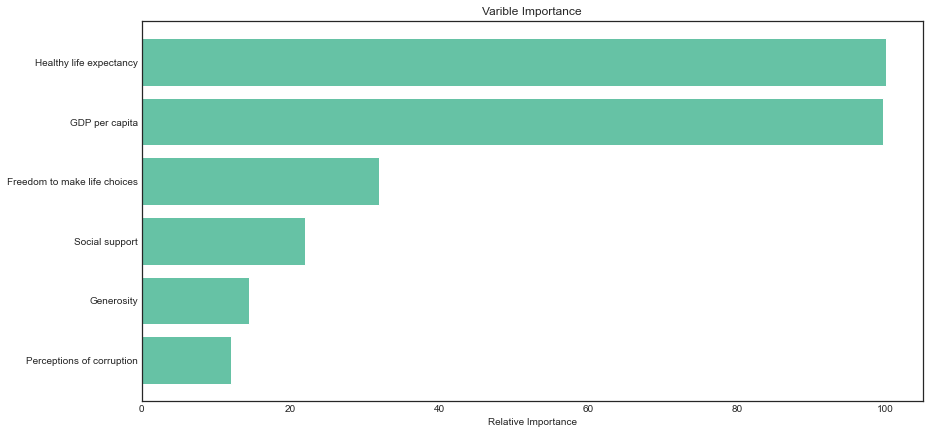

In [56]:
feature_importance= model.feature_importances_
feature_importance=100.0*(feature_importance/feature_importance.max())
sorted_idx= np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos,feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Varible Importance')
plt.show()

In [57]:

from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.05,0.01
                      ], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(),
           param_grid = LR, scoring='r2')
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 250}, 0.7925703332761338)